# Die Rolls

Given n die rolls, give me probabilities of the next die roll.

In [1]:
import pymc as pm
import numpy as np
import pytensor
import pytensor.tensor as pt
import arviz as az
import matplotlib.pyplot as plt
import scipy as sp

In [18]:
data = np.array([1, 1, 1, 1, 2, 3, 4, 5, 6, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 1])
data_encoded = data-1
with pm.Model() as model:
    p = pm.Dirichlet("p", a=np.ones(6))
#     category = pm.Categorical("die_result", p=p, shape=1, observed=data_encoded)
    category = pm.Categorical("die_result", p=p, observed=data_encoded)
    
    trace = pm.sample(1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


In [19]:
trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 1000, p_dim_0: 6)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * p_dim_0  (p_dim_0) int64 0 1 2 3 4 5
Data variables:
    p        (chain, draw, p_dim_0) float64 0.415 0.09263 ... 0.1604 0.1102
Attributes:
    created_at:                 2023-02-23T13:24:59.696350
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  5.0.2
    sampling_time:              18.678410291671753
    tuning_steps:               1000

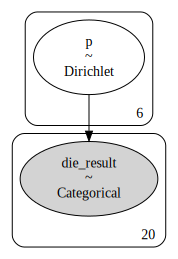

In [20]:
pm.model_to_graphviz(model)

In [21]:
print("Probabilities of the next die roll:")
for i, p in enumerate(trace.posterior['p'][0][0]):
    print("{}: {:.2%}".format(i+1, p))

Probabilities of the next die roll:
1: 41.50%
2: 9.26%
3: 10.30%
4: 9.67%
5: 6.90%
6: 22.36%
